##**Lung Cancer Detection**##

Deteksi Kanker Paru-paru dibuat menggunakan *Machine Learning* dengan Algoritma *Artificial Neural Network (ANN) Backpropagation Methods* dan *Decision Tree C4.5 Methods*

Kita impor library yang kita butuhkan

In [ ]:
# Import Library
import warnings; warnings.simplefilter ('ignore')
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
print(tf.__version__)

2.15.0


Setelah mengimpor library yang dibutuhkan, selanjutnya upload datasetnya

Sumber dataset ▶ https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data

In [ ]:
# Upload File
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving survey lung cancer.csv to survey lung cancer.csv
User uploaded file "survey lung cancer.csv" with length 11277 bytes


In [ ]:
# Visualize the Data
df = pd.read_csv("survey lung cancer.csv")
df.head(10)

N, P = df.shape # Data Size
print('Baris = ', N, '\nKolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(df))
df

Baris =  309 
Kolom (jumlah variabel) =  16
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# Look the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# List Column
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

Keterangan:

**GENDER** = Jenis Kelamin

**AGE** = Usia

**SMOKING** = Merokok

**YELLOW_FINGERS** = Jari Kuning

**ANXIETY** = Kecemasan

**PEER_PRESSURE** = Tekanan Teman Sebaya

**CHRONIC_DISEASE** = Penyakit Kronis

**FATIGUE** = Kelelahan

**ALLERGY** = Alergi

**WHEEZING** = Mengi
       
**ALCOHOL CONSUMING** = Konsumsi Alkohol

**COUGHING** = Batuk-batuk

**SHORTNESS OF BREATH** = Sesak Nafas
       
**SWALLOWING DIFFICULTY** = Kesulitan Menelan

**CHEST PAIN** = Nyeri Dada

**LUNG_CANCER** = Kanker Paru-paru

Jika dilihat dari daftar kolom sebelumnya, ada kolom yang memiliki *Extra Space* yaitu **'FATIGUE '** dan **'ALLERGY '**.

Atasi terlebih dahulu.

In [ ]:
# Remove extra space in column name
df.rename(columns={'FATIGUE ': 'FATIGUE'}, inplace=True)
df.rename(columns={'ALLERGY ': 'ALLERGY'}, inplace=True)

Periksa apakah data memiliki duplikasi. Jika memiliki data yang terduplikasi, alangkah baiknya di hilangkan

In [ ]:
# Checking for Duplicates
df.duplicated().sum()

33

In [ ]:
# Removing Duplicates
df_drop_duplicate = df.copy()
df_drop_duplicate = df.drop_duplicates()

# Look the update dataset
df_drop_duplicate

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [ ]:
# Look the type of Data
df_drop_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

Dari info yang didapat, dataset memiliki 14 kolom bertipe **int** dan memiliki 2 kolom bertipe **object**

Untuk data bertipe **object** diubah menjadi data **category** untuk mengefisensi pemrosesan data

In [ ]:
# View data in the form of 'objects'
df_clean_objects = df_drop_duplicate.copy()
df_object_variable = df_clean_objects.select_dtypes(include=['object'])

# Do a loop on the variable 'df'
for col in df_object_variable.columns:  # Changing only columns of type 'object'
    df_clean_objects[col] = df_clean_objects[col].astype('category')

# View the latest data info
df_clean_objects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 276 non-null    category
 1   AGE                    276 non-null    int64   
 2   SMOKING                276 non-null    int64   
 3   YELLOW_FINGERS         276 non-null    int64   
 4   ANXIETY                276 non-null    int64   
 5   PEER_PRESSURE          276 non-null    int64   
 6   CHRONIC DISEASE        276 non-null    int64   
 7   FATIGUE                276 non-null    int64   
 8   ALLERGY                276 non-null    int64   
 9   WHEEZING               276 non-null    int64   
 10  ALCOHOL CONSUMING      276 non-null    int64   
 11  COUGHING               276 non-null    int64   
 12  SHORTNESS OF BREATH    276 non-null    int64   
 13  SWALLOWING DIFFICULTY  276 non-null    int64   
 14  CHEST PAIN             276 non-null    int64   

Selanjutnya buat rangkuman dari dataset yang didapatkan

In [ ]:
# Summary Data
df_clean_objects.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Dari info di atas dapat dilihat dalam data ini usia minimum berada pada di usia 21 tahun, maksimum 87 tahun, dan rata-rata nya berada pada rentang usia 62 - 63 tahun.

Selanjutnya check apakah ada data yang memiliki *Missing Values*

In [ ]:
# Looking at the Missing Values
df_clean_objects.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Dalam dataset ini, tidak terdapat *Missing Values* dan dapat dilanjutkan ke dalam tahap berikutnya.

Dari sekian banyak data yang terdapat dalam dataset ternyata tidak dapat dilihat satu per satu untuk memeriksa apakah ada data yang bersifat unik atau tidak. Penyebabnya adalah keterbatasan Sumber Daya *Python* itu sendiri

Untuk hal itu, maka perlu dilakukan pemeriksaan dengan membangun code sederhana:

In [ ]:
# Look at unique data
df_is_unique = df_clean_objects.select_dtypes(include = ['category', 'int64'])

for col in df_is_unique.columns:
  print(col,':', set (df[col].unique()))

GENDER : {'M', 'F'}
AGE : {21, 38, 39, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 87}
SMOKING : {1, 2}
YELLOW_FINGERS : {1, 2}
ANXIETY : {1, 2}
PEER_PRESSURE : {1, 2}
CHRONIC DISEASE : {1, 2}
FATIGUE : {1, 2}
ALLERGY : {1, 2}
WHEEZING : {1, 2}
ALCOHOL CONSUMING : {1, 2}
COUGHING : {1, 2}
SHORTNESS OF BREATH : {1, 2}
SWALLOWING DIFFICULTY : {1, 2}
CHEST PAIN : {1, 2}
LUNG_CANCER : {'YES', 'NO'}


Dari informasi di atas, kolom **GENDER** sifatnya mengklasifikasikan antara Pria (M) dan Wanita (F). Pada kolom **AGE** memberikan informasi umur berapa saja yang terdapat dalam dataset ini. **SMOKING - CHEST_PAIN** memberikan tanda bahwasannya seseorang terklasifikasi kedalam kriteria 'ya' atau 'tidak' dengan bilangan '1' dan '2'. Kolom **LUNG_CANCER** adalah output nya.

Perlu diketahui dalam pemrograman, komputer hanya mengenal angka biner (0 dan 1). Dalam kolom **SMOKING - CHEST_PAIN** justru terisi bilangan angka '1' dan '2' yang mana bilangan '2' termasuk angka non-biner. Jadi perlu dilakukan modifikasi dalam kolom-kolom tersebu dan dalam kolom **LUNG_CANCER** juga perlu diubah menjadi **0 (NO)** dan **1 (YES)**

In [ ]:
# Create a new initial variable so that the old variable can still be used
df_to_binary = df_clean_objects.copy()

# Define a mapping dictionary for binary conversion
binary_mapping = {1: 0, 2: 1}

# Define mapping for 'LUNG_CANCER'
lung_cancer_mapping = {'NO': 0, 'YES': 1}

# Apply the mapping to the specified columns
columns_to_convert = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                      'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                      'SWALLOWING DIFFICULTY', 'CHEST PAIN',]

df_to_binary[columns_to_convert] = df_to_binary[columns_to_convert].applymap(lambda x: binary_mapping.get(x, x))

# Apply the mapping to 'LUNG_CANCER' column
df_to_binary['LUNG_CANCER'] = df_to_binary['LUNG_CANCER'].map(lung_cancer_mapping)

# Changed the data type of column 'LUNG_CANCER' from category to int64
df_to_binary['LUNG_CANCER'] = df_to_binary['LUNG_CANCER'].astype('int64')

# Display the updated DataFrame
df_to_binary.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
5,F,75,0,1,0,0,1,1,1,1,0,1,1,0,0,1
6,M,52,1,0,0,0,0,1,0,1,1,1,1,0,1,1
7,F,51,1,1,1,1,0,1,1,0,0,0,1,1,0,1
8,F,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0
9,M,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1


In [ ]:
df_to_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 276 non-null    category
 1   AGE                    276 non-null    int64   
 2   SMOKING                276 non-null    int64   
 3   YELLOW_FINGERS         276 non-null    int64   
 4   ANXIETY                276 non-null    int64   
 5   PEER_PRESSURE          276 non-null    int64   
 6   CHRONIC DISEASE        276 non-null    int64   
 7   FATIGUE                276 non-null    int64   
 8   ALLERGY                276 non-null    int64   
 9   WHEEZING               276 non-null    int64   
 10  ALCOHOL CONSUMING      276 non-null    int64   
 11  COUGHING               276 non-null    int64   
 12  SHORTNESS OF BREATH    276 non-null    int64   
 13  SWALLOWING DIFFICULTY  276 non-null    int64   
 14  CHEST PAIN             276 non-null    int64   

Dalam kolom **SMOKING - CHEST_PAIN** yang tadinya angka non-biner, sekarang telah menjadi bilangan biner yakni '0' dan '1'. Sekarang lihat kolom terbarunya.

In [ ]:
df_after_binary = df_to_binary.select_dtypes(include = ['category', 'int64'])

for col in df_after_binary.columns:
  print(col,':', set (df_after_binary[col].unique()))

GENDER : {'M', 'F'}
AGE : {21, 38, 39, 44, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 87}
SMOKING : {0, 1}
YELLOW_FINGERS : {0, 1}
ANXIETY : {0, 1}
PEER_PRESSURE : {0, 1}
CHRONIC DISEASE : {0, 1}
FATIGUE : {0, 1}
ALLERGY : {0, 1}
WHEEZING : {0, 1}
ALCOHOL CONSUMING : {0, 1}
COUGHING : {0, 1}
SHORTNESS OF BREATH : {0, 1}
SWALLOWING DIFFICULTY : {0, 1}
CHEST PAIN : {0, 1}
LUNG_CANCER : {0, 1}



Setelah itu, kita lihat bagaimana persebaran datanya dalam bentuk plot histogram.

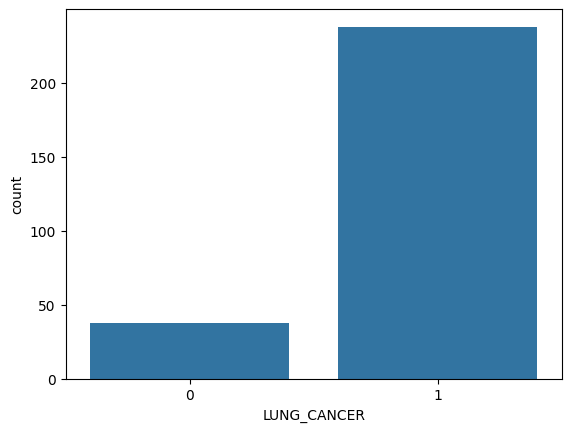

Counter({1: 238, 0: 38})
YES =  0.0 % NO =  0.0 %


In [ ]:
from collections import Counter

sns.countplot(data=df_after_binary, x='LUNG_CANCER')
plt.show()

D = Counter(df_after_binary['LUNG_CANCER'])
print(D)
print("YES = ", D['YES']*100/(len(df_after_binary['LUNG_CANCER'])),'% NO = ', D['NO']*100/(len(df_after_binary['LUNG_CANCER'])),'%')

Terlihat di atas data nya masih *imbalance* dan perlu ditangani lebih lanjut sebelum membangun Algoritma *Machine Learning*

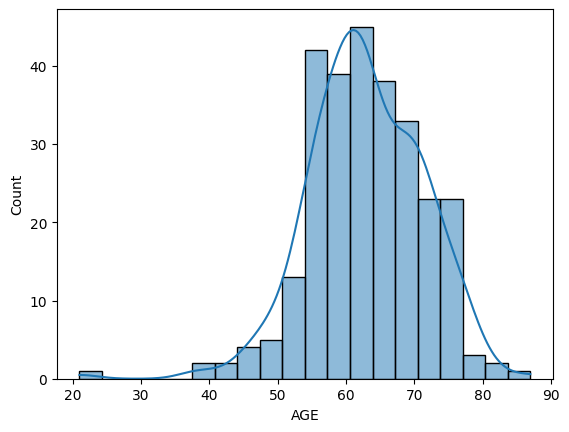

In [ ]:
sns.histplot (data=df_after_binary, x= 'AGE', kde=True)
plt.show()

<Axes: xlabel='CHEST PAIN'>

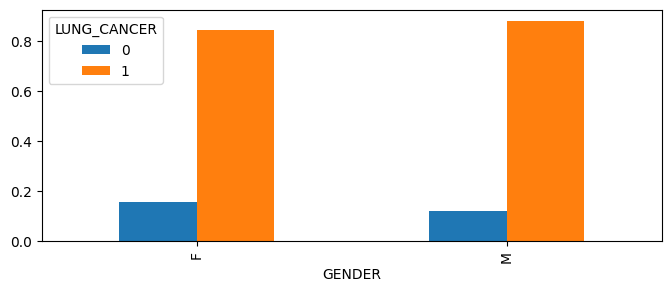

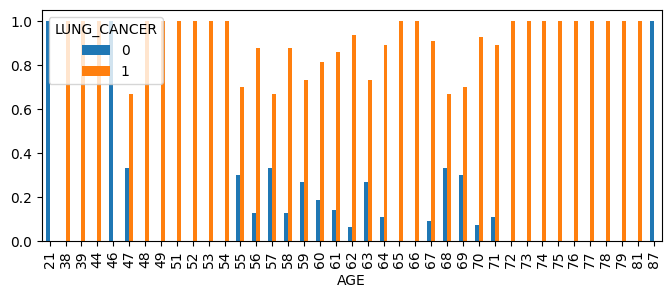

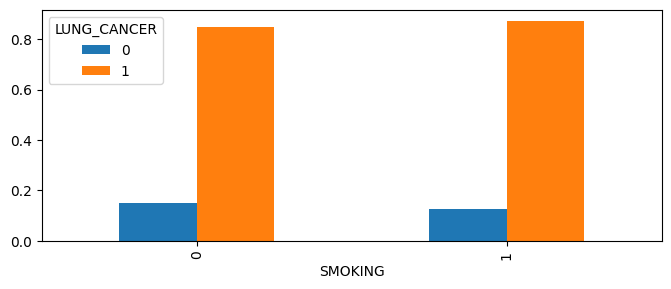

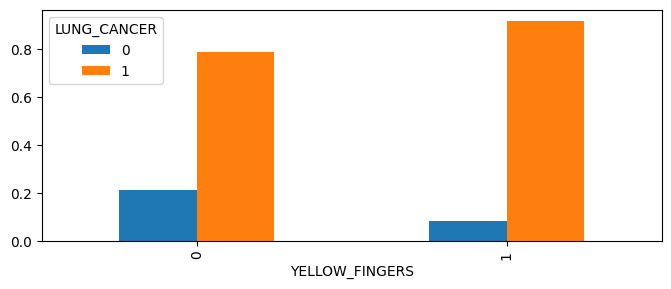

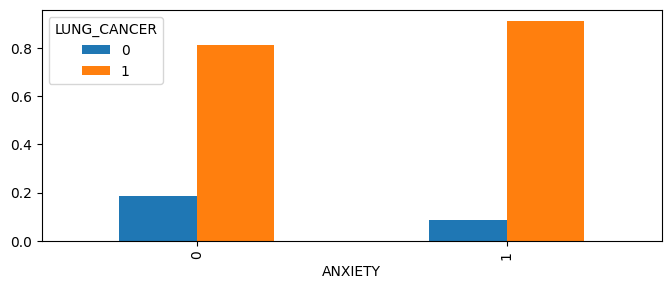

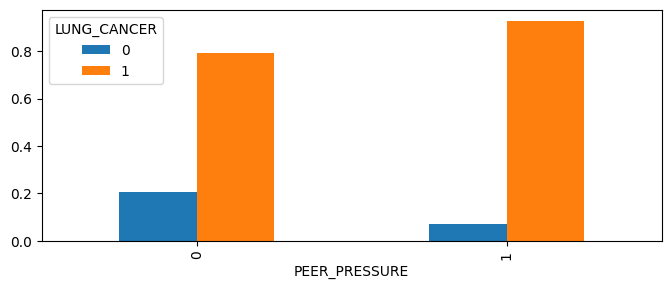

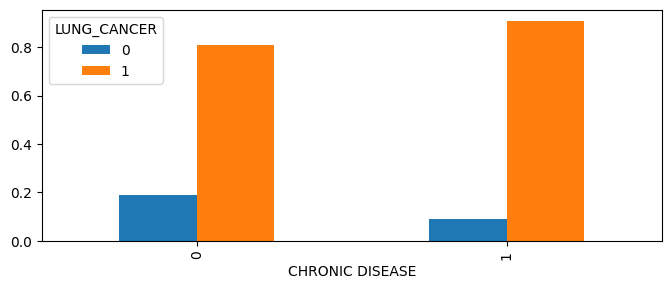

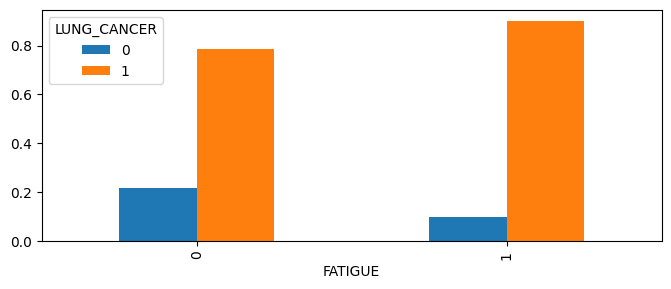

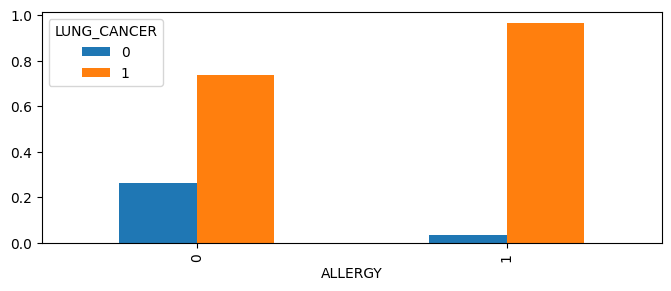

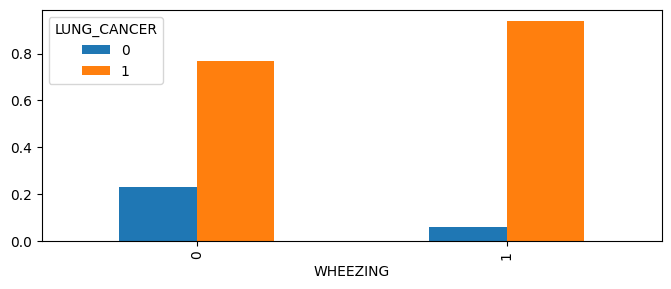

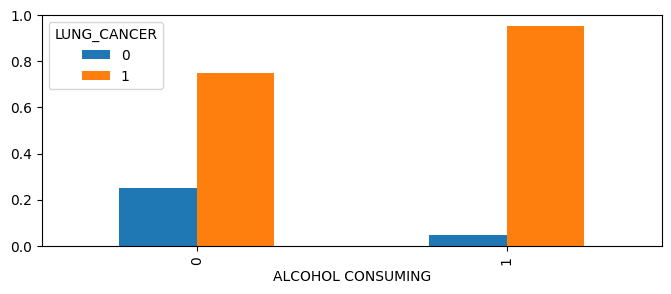

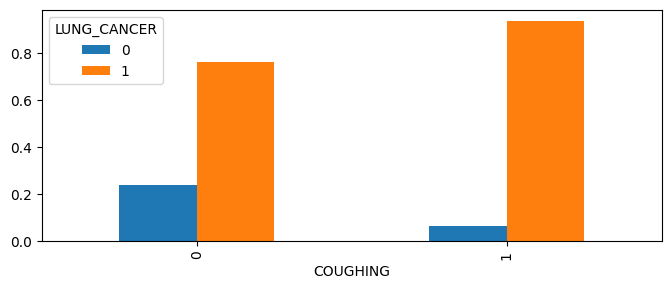

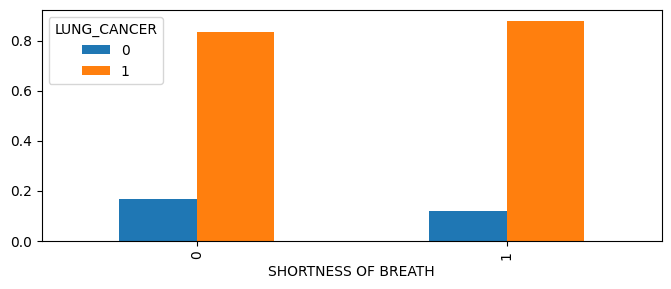

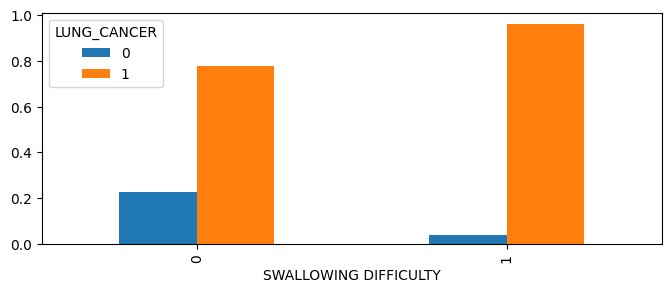

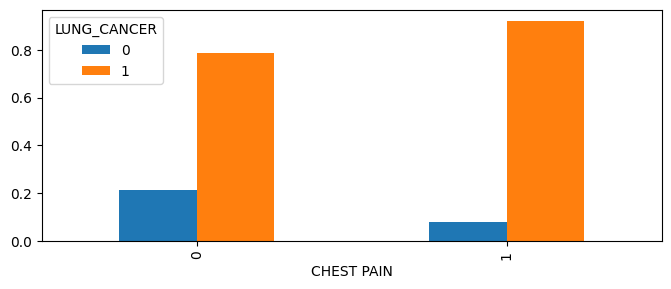

In [ ]:
# Function for plotting
def plot(col, df_after_binary=df_after_binary):
    return df_after_binary.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8, 3))

plot('GENDER')
plot('AGE')
plot('SMOKING')
plot('YELLOW_FINGERS')
plot('ANXIETY')
plot('PEER_PRESSURE')
plot('CHRONIC DISEASE')
plot('FATIGUE')
plot('ALLERGY')
plot('WHEEZING')
plot('ALCOHOL CONSUMING')
plot('COUGHING')
plot('SHORTNESS OF BREATH')
plot('SWALLOWING DIFFICULTY')
plot('CHEST PAIN')

Dari visualisasi di atas, dapat diketahui untuk kolom **AGE** tidak memiliki banyak hubungan dengan output nya pada kolom **LUNG_CANCER**, maka kolom tersebut ada baiknya dilakukan metode *drop*.

In [ ]:
# Remove 'AGE' columns
df_drop_age = df_after_binary.copy()
df_after_drop_age = df_drop_age.drop(columns=['AGE'])

# View the latest data after deleting the 'AGE' column
df_after_drop_age

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,F,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,M,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,M,0,1,1,0,0,0,0,0,0,0,0,1,1,0


**Correlation**

Korelasi bertujuan untuk mengetahui hubungan antar variabel. Dalam konteks ini, korelasi setiap kolom terhadap *output* nya yaitu **LUNG_CANCER** akan divisualisasikan menggunakan *heatmap*.

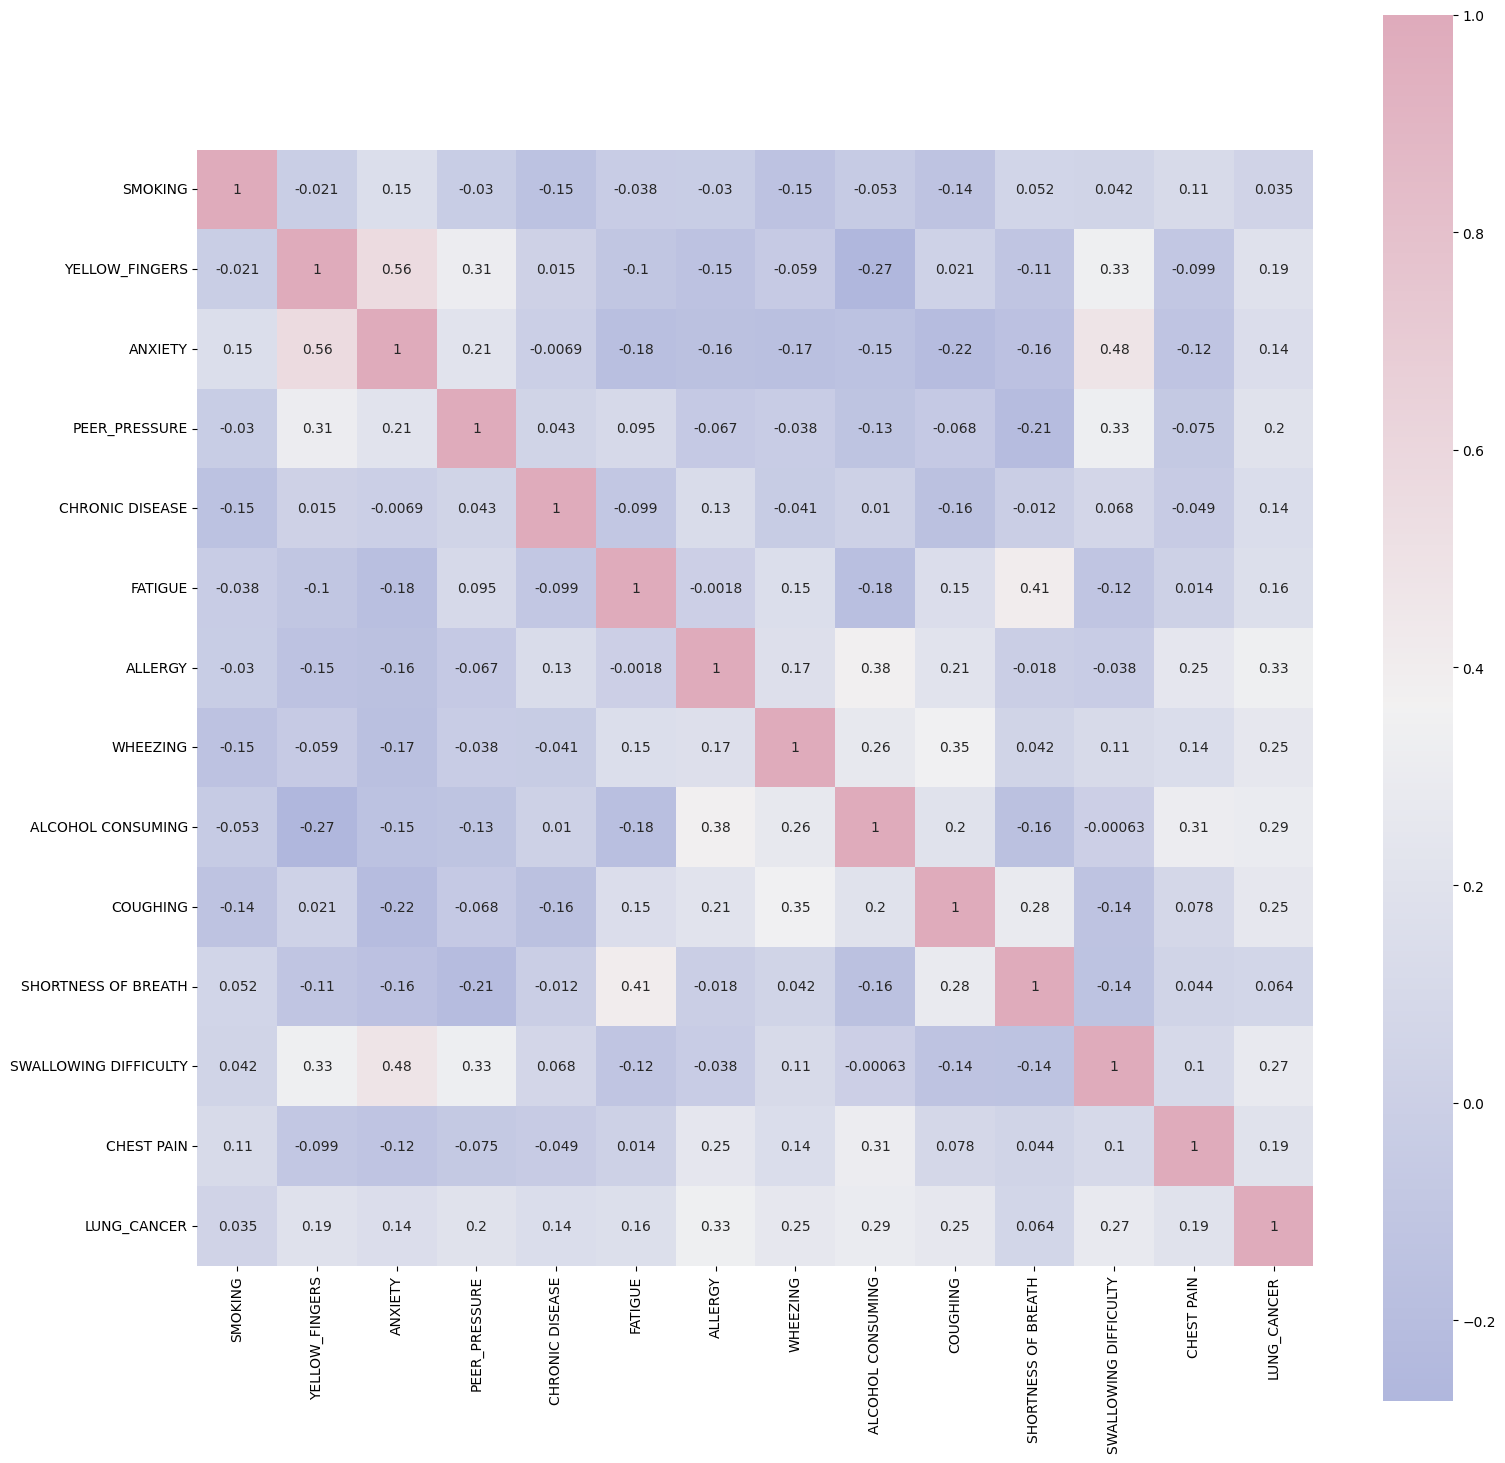

In [ ]:
# Find the correlation
correlation_dataset = df_after_drop_age.select_dtypes(include=['number']).corr() # Select only numerical columns

# Visualize
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18, 18))
sns.heatmap(correlation_dataset, cmap=cmap, annot=True, square=True)
plt.show()

<Axes: >

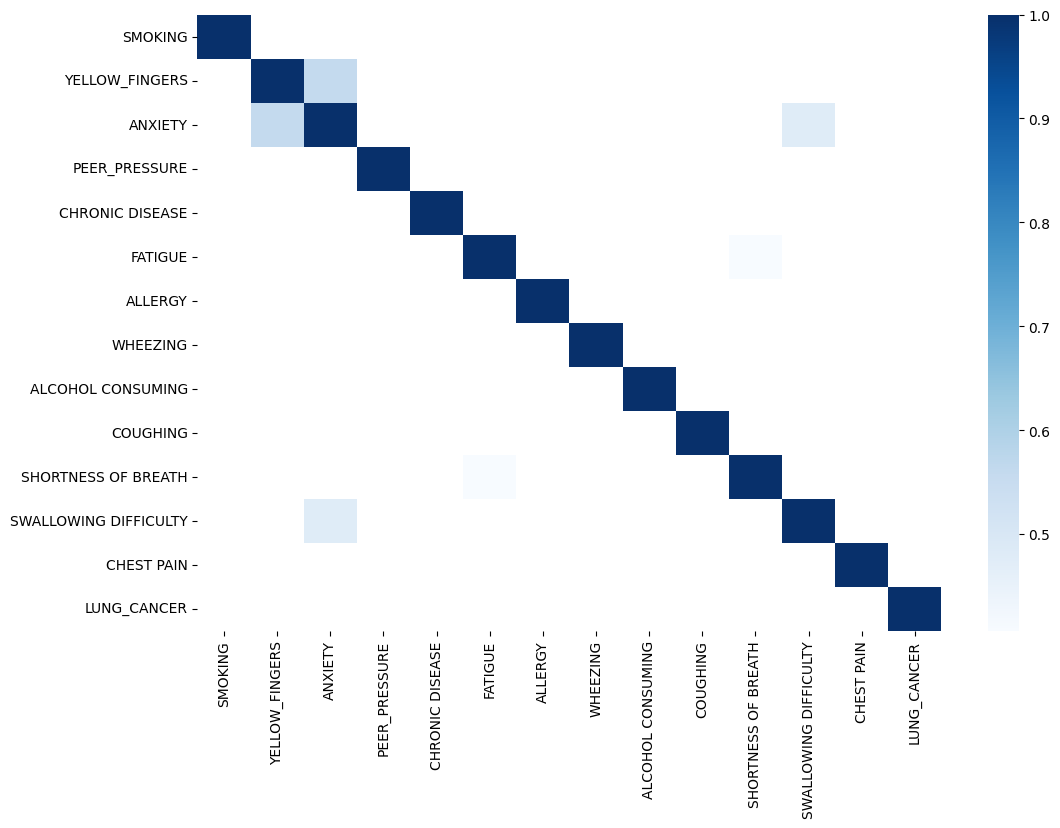

In [ ]:
kot = correlation_dataset[correlation_dataset>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

##**Feature Engineering**##

***Feature Engineering*** merupakan teknik pembuatan fitur baru dengan fitur yang sudah ada dengan tujuan peningkatan kinerja model *Machine Learning*.

Dalam dataset yang digunakan dalam model ini, didapatkan informasi dari visualisasi matriks korelasi yang menunjukkan untuk kolom **ANXIETY** dan **YELLOW_FINGERS** memiliki korelasi lebih dari 50%. Berdasarkan informasi yang didapat, buat fitur terbaru dengan teknik ***Feature Engineering***.

In [ ]:
# Create the new column 'ANX_YELFIN'
df_feature_engineer = df_after_drop_age.copy()
df_feature_engineer['ANX_YELFIN'] = df_feature_engineer['ANXIETY'] * df_feature_engineer['YELLOW_FINGERS']

# Define the position where 'ANX_YELFIN' should be inserted
insert_position = df_feature_engineer.columns.get_loc('LUNG_CANCER')

# Insert 'ANX_YELFIN' column before 'LUNG_CANCER'
df_feature_engineer.insert(insert_position, 'ANX_YELFIN', df_feature_engineer.pop('ANX_YELFIN'))

# Display the updated DataFrame
df_feature_engineer

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,ANX_YELFIN,LUNG_CANCER
0,M,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,M,1,0,0,0,1,1,1,0,0,0,1,1,1,0,1
2,F,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,M,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0
4,F,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1
280,F,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
281,M,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
282,M,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0


**One-Hot Encoding (OHE)**

Teknik *One-Hot Encoding* (OHE) merupakan teknik mengubah data kategorikal menjadi data numerik untuk memberikan sebuah pengetahuan pada model *Machine Learning* bahwasannya preferensi akan suatu label tertentu pada dasarnya sama.

Dalam hal ini, kolom **GENDER** yang berkategorikan Female (F) dan Male (M) pada dasarnya adalah hal yang alamiah dan tidak dapat diklasifikasi langsung sebagai (0,1). Akibat jika hal tersebut terjadi adalah model menjadi salah tafsir dikarenakan menganggap adanya semacam hierarki di dalamnya.

Maka dari itu, perlu dilakukan metode OHE dalam tahap pemrosesan data ini.

In [ ]:
encode_data = df_feature_engineer.copy()

encode_data['GENDER'] = encode_data['GENDER'].astype('object')
columns = ['GENDER']
transformation_gender = pd.get_dummies(encode_data['GENDER'], prefix='GENDER')
encode_data = pd.concat([encode_data, transformation_gender], axis=1)

# Remove 'GENDER' column after one-hot encoding
try:
    encode_data.drop(columns, axis=1, inplace=True)
except Exception as err_:
    print(err_)

# Move columns 'GENDER_F' and 'GENDER_M' before 'LUNG_CANCER'
cols_to_move = ['GENDER_F', 'GENDER_M']
encode_data = encode_data[cols_to_move + [col for col in encode_data.columns if col not in cols_to_move]]

# See the latest data after using the 'One-Hot Encoding' technique
J, K = encode_data.shape # Data Size
print('Baris terbaru = ', J, '\nKolom (jumlah variabel) terbaru = ', K)
print("Tipe Variabel Data Encoding = ", type(encode_data))
encode_data.head()

Baris terbaru =  276 
Kolom (jumlah variabel) terbaru =  17
Tipe Variabel Data Encoding =  <class 'pandas.core.frame.DataFrame'>


,GENDER_F,GENDER_M,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,ANX_YELFIN,LUNG_CANCER
0,False,True,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,False,True,1,0,0,0,1,1,1,0,0,0,1,1,1,0,1
2,True,False,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,False,True,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0
4,True,False,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0


In [ ]:
# Check the type of data that has been encoded
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER_F               276 non-null    bool 
 1   GENDER_M               276 non-null    bool 
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  ANX_YELFIN             276 non-null    int64


##**Model Machine Learning**##

Model Machine Learning yang dibuat menggunakan *Artificial Neural Network (ANN) Backpropagation Methods* dan *Decision Tree C4.5 Methods*

**Artificial Neural Network (ANN)**

Dalam membuat dan melatih model ANN, ada library yang disediakan oleh Google langsung bernama Tensorflow.

Sebelum melatih model, alangkah baiknya diubah dulu jenis data 'int64' menjadi 'float64'. Alasannya karena ketika melatih model, model akan dikonversikan terlebih dahulu menjadi 'Tensorflow Dataset'.

Tensorflow sendiri hanya mendukung variabel 'float' bukan 'int' ketika ingin dikonversikan ke dalam numpy.

In [ ]:
# Convert Pandas Dataframe to Tensorflow Dataset
df_tf_convert = encode_data.copy()
print("Kolom yang ada di dalam :\n",df_tf_convert.columns)

# Remove whitespaces from column names
df_tf_convert.columns = df_tf_convert.columns.str.strip()

# Update columns_to_convert_float_corrected
columns_to_convert_float_corrected = ['GENDER_F', 'GENDER_M', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                      'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
                                      'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANX_YELFIN', 'LUNG_CANCER']

# Convert specified columns to float64
df_tf_convert[columns_to_convert_float_corrected] = df_tf_convert[columns_to_convert_float_corrected].astype('float64')

# Look the data after updating
df_tf_convert

Kolom yang ada di dalam :
 Index(['GENDER_F', 'GENDER_M', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'ANX_YELFIN', 'LUNG_CANCER'],
      dtype='object')


,GENDER_F,GENDER_M,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,ANX_YELFIN,LUNG_CANCER
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
280,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
281,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
282,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
# See the data type after updating
df_tf_convert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER_F               276 non-null    float64
 1   GENDER_M               276 non-null    float64
 2   SMOKING                276 non-null    float64
 3   YELLOW_FINGERS         276 non-null    float64
 4   ANXIETY                276 non-null    float64
 5   PEER_PRESSURE          276 non-null    float64
 6   CHRONIC DISEASE        276 non-null    float64
 7   FATIGUE                276 non-null    float64
 8   ALLERGY                276 non-null    float64
 9   WHEEZING               276 non-null    float64
 10  ALCOHOL CONSUMING      276 non-null    float64
 11  COUGHING               276 non-null    float64
 12  SHORTNESS OF BREATH    276 non-null    float64
 13  SWALLOWING DIFFICULTY  276 non-null    float64
 14  CHEST PAIN             276 non-null    float64
 15  ANX_YELFIN 

**Splitting Dataset**

Dataset dibagi menjadi *Data Training* dan *Data Testing*. Tujuannya untuk melihat seberapa besar potensi model yang dibuat untuk melakukan prediksi dengan data yang telah diperoleh.

Pembagian:

*Data Training* = 80%

*Data Testing* = 20%

In [ ]:
# Set x and y
x = df_tf_convert.drop('LUNG_CANCER', axis=1)
y = df_tf_convert['LUNG_CANCER']

Karena data imbalance dan perlu ditangani, maka tangani dengan menggunakan ADSYN

In [ ]:
# Address data oversampling by using ADASYN
# ADSYN: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
x, y = adasyn.fit_resample(x, y)

print(f"Jumlah data dalam x sekarang: {len(x)} dan jumlah data y sekarang: {len(y)}")

Jumlah data dalam x sekarang: 481 dan jumlah data y sekarang: 481


In [ ]:
# Splitting into train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert Dataframe to Tensorflow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test.values, y_test.values))

print("Ukuran Input (x) Training  =", x_train.shape, "\nUkuran Output (y) Training =", y_train.shape)
print("Ukuran Input (x) Testing  =", x_test.shape, "\nUkuran Output (y) Testing =", y_test.shape)

Ukuran Input (x) Training  = (384, 16) 
Ukuran Output (y) Training = (384,)
Ukuran Input (x) Testing  = (97, 16) 
Ukuran Output (y) Testing = (97,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1038, input_shape=(len(x_train.columns),), activation='relu', name="dense_1"),
    tf.keras.layers.Dense(512, activation='relu', name="dense_2"),
    tf.keras.layers.Dense(132, activation='relu', name="dense_3"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_4"),
    tf.keras.layers.Dense(1, activation='sigmoid', name="dense_5"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1038)              17646     
                                                                 
 dense_2 (Dense)             (None, 512)               531968    
                                                                 
 dense_3 (Dense)             (None, 132)               67716     
                                                                 
 dense_4 (Dense)             (None, 32)                4256      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 621619 (2.37 MB)
Trainable params: 621619 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Setelah dibuat beberapa layer, selanjutnya adalah menambahkan $w$ dan $b$ dengan persamaan yang telah didapat yaitu:

$$f_{(w,b)}(x) = \vec{w}\vec{x}+b ...... (2.1)$$

Aktivasi yang digunakan dalam layer tersebut adalah ***Sigmoid Activation*** dengan persamaan:
$$g(z) = \frac{1}{1 + e^{-z}}......(2.7)$$

dan ***ReLu Activation*** dengan persamaan:
$$f(x) = max(0,x) ...... (2.8)$$

Persamaan **(2.1)** diterapkan dalam persamaan **(2.7)** dan **(2.8)** dengan $g(z) = f_{(w,b)}(x)$ maka:

$$g_{(w,b)}(x) = \frac{1}{1 + e^{-(\vec{w}\vec{x}+b)}}......(2.7.1)$$

$$f_{(w,b)}(x) = max(0,{\vec{w}\vec{x}+b}) ...... (2.8.1)$$

In [ ]:
# Define w and b as trainable variables
W1, b1 = model.get_layer("dense_1").get_weights()
W2, b2 = model.get_layer("dense_2").get_weights()
W3, b3 = model.get_layer("dense_3").get_weights()
W4, b4 = model.get_layer("dense_4").get_weights()
W5, b5 = model.get_layer("dense_5").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)
print(f"W3{W3.shape}:\n", W3, f"\nb1{b3.shape}:", b3)
print(f"W4{W4.shape}:\n", W4, f"\nb2{b4.shape}:", b4)
print(f"W5{W5.shape}:\n", W5, f"\nb2{b5.shape}:", b5)

W1(16, 1038):
 [[ 0.02067629 -0.02388625 -0.01154703 ... -0.01161945  0.04739887
  -0.00214504]
 [-0.06484292  0.05246402  0.06636044 ... -0.01359324  0.05838105
   0.07294826]
 [ 0.02033795  0.04986319  0.01808416 ... -0.05280514  0.05857949
  -0.03745348]
 ...
 [ 0.06656134 -0.05433398  0.00951168 ...  0.05408752  0.00682116
   0.04318687]
 [-0.05465968  0.0256936  -0.00791043 ... -0.07248806  0.04822594
   0.02685161]
 [ 0.04575054 -0.07315229  0.05043083 ...  0.04207391  0.02947946
  -0.03278962]] 
b1(1038,): [0. 0. 0. ... 0. 0. 0.]
W2(1038, 512):
 [[-0.03409472  0.03839087  0.04542912 ... -0.03804402 -0.0104365
  -0.03496136]
 [-0.0489294   0.02050374  0.00479873 ... -0.04399487  0.00736327
  -0.0103795 ]
 [ 0.03043465  0.02999487  0.03017151 ...  0.04937632  0.05085614
   0.01423433]
 ...
 [-0.0138755   0.00309104  0.02292136 ... -0.05753385 -0.0216761
  -0.02232327]
 [-0.03807219 -0.00170439 -0.03032483 ... -0.01596026  0.0566153
  -0.02210062]
 [ 0.04186012 -0.04745322 -0.02246

In [ ]:
# Define the optimizer, loss function, and metrics
optimizer_function = tf.keras.optimizers.Adam()
loss_function = tf.keras.losses.BinaryCrossentropy()

# Compile model
model.compile(optimizer=optimizer_function,
              loss=loss_function,
              metrics=['accuracy'])

Setelah mendefinisikan dan melakukan *compile model*, langkah selanjutnya adalah melatih modelnya menggunakan Algoritma ***Backpropagation***.

In [ ]:
# Training loop with tf.GradientTape
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_function(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer_function.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, predictions

# Training the model
epochs = 20
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.BinaryAccuracy()

    # Training loop with batching
    for x_batch, y_batch in train_dataset.batch(32):
        loss_value, predictions = train_step(x_batch, y_batch)
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y_batch, predictions)

    # Calculate validation loss and accuracy
    val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=2)

    # Append to lists for plotting
    train_losses.append(epoch_loss_avg.result())
    train_accuracies.append(epoch_accuracy.result())
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Display metrics at the end of each epoch
    print(f"Epoch {epoch + 1}: Loss: {epoch_loss_avg.result()}, Accuracy: {epoch_accuracy.result()}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

4/4 - 0s - loss: 0.3124 - accuracy: 0.9072 - 305ms/epoch - 76ms/step
Epoch 1: Loss: 0.5307462811470032, Accuracy: 0.7395833134651184, Val Loss: 0.31243258714675903, Val Accuracy: 0.907216489315033
4/4 - 0s - loss: 0.1765 - accuracy: 0.9278 - 38ms/epoch - 10ms/step
Epoch 2: Loss: 0.25024154782295227, Accuracy: 0.9036458134651184, Val Loss: 0.17649970948696136, Val Accuracy: 0.9278350472450256
4/4 - 0s - loss: 0.1366 - accuracy: 0.9485 - 32ms/epoch - 8ms/step
Epoch 3: Loss: 0.1777368038892746, Accuracy: 0.9244791865348816, Val Loss: 0.13657520711421967, Val Accuracy: 0.9484536051750183
4/4 - 0s - loss: 0.1296 - accuracy: 0.9381 - 31ms/epoch - 8ms/step
Epoch 4: Loss: 0.13448257744312286, Accuracy: 0.9505208134651184, Val Loss: 0.12957029044628143, Val Accuracy: 0.938144326210022
4/4 - 0s - loss: 0.1365 - accuracy: 0.9485 - 62ms/epoch - 15ms/step
Epoch 5: Loss: 0.12483810633420944, Accuracy: 0.9557291865348816, Val Loss: 0.13647788763046265, Val Accuracy: 0.9484536051750183
4/4 - 0s - loss

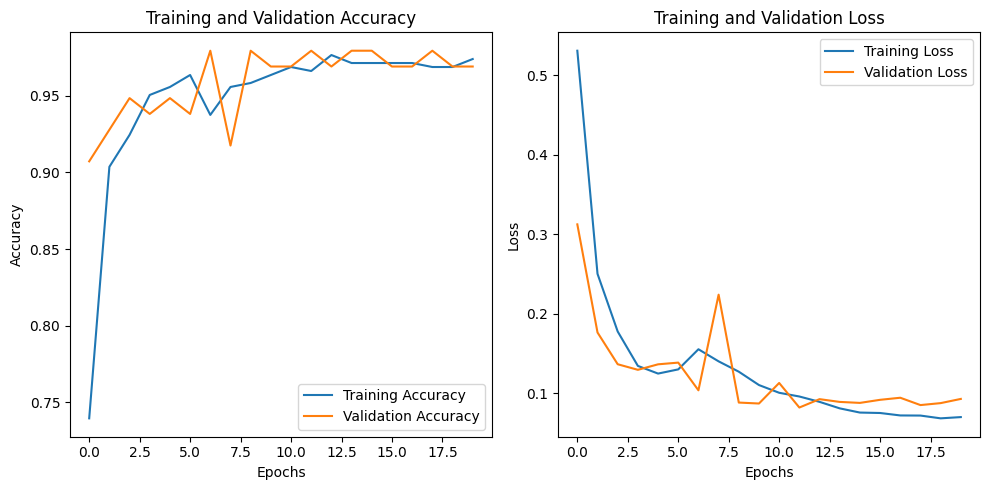

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

12/12 [==============================] - 0s 7ms/step


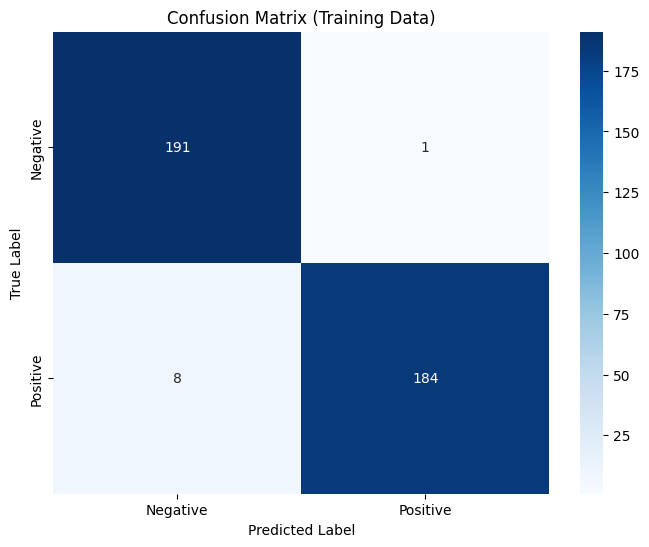

Training Data Confusion Matrix:
[[191   1]
 [  8 184]]

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       192
           1       0.99      0.96      0.98       192

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



In [ ]:
# Predict training set labels
y_train_pred = model.predict(x_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Convert predictions to binary labels for training data
y_train_binary = (y_train > 0.5).astype(int)

# Compute confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train_binary, y_train_pred_binary)

# Compute classification report for training data
train_class_report = classification_report(y_train_binary, y_train_pred_binary)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Data)')
plt.show()

print("Training Data Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Data Classification Report:")
print(train_class_report)

4/4 [==============================] - 0s 6ms/step


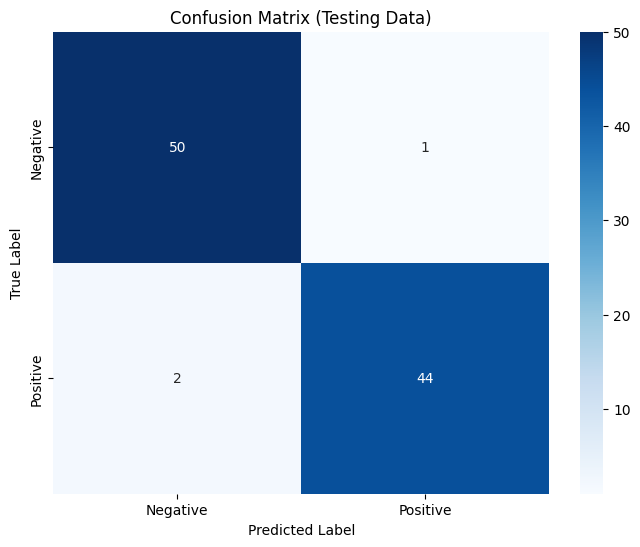

Testing Data Confusion Matrix:
[[50  1]
 [ 2 44]]

Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.98      0.96      0.97        46

    accuracy                           0.97        97
   macro avg       0.97      0.97      0.97        97
weighted avg       0.97      0.97      0.97        97



In [ ]:
# Predict testing set labels
y_test_pred = model.predict(x_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Convert predictions to binary labels for testing data
y_test_binary = (y_test > 0.5).astype(int)

# Compute confusion matrix for testing data
test_conf_matrix = confusion_matrix(y_test_binary, y_test_pred_binary)

# Compute classification report for testing data
test_class_report = classification_report(y_test_binary, y_test_pred_binary)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

print("Testing Data Confusion Matrix:")
print(test_conf_matrix)
print("\nTesting Data Classification Report:")
print(test_class_report)

***Decision Tree***

*Decision Tree* merupakan metode *Supervised Learning* yang efektif digunakan dalam aplikasi *Machine Learning* yang berbentuk klasifikasi pohon. Algoritma yang dipakai dalam model ini adalah C4.5

Dalam menentukan *Decision Tree* dengan C4.5, data dihitung dan dikomputasi dengan menentukan nilai *Entropy* yang merupakan ukuran
ketidakpastian, yaitu perbedaan keputusan terhadap nilai atribut tertentu.

Nilai ini dapat ditulis dengan persamaan:

$$Entropy(S)=-\sum_{i=1}^{k}p_i*log_2 p_i ......(2.16)$$
dengan $p_i$ sebagai probabilitas dari $i$ sampai $k$ (untuk $i = 1, ... , k$).

Selanjutnya dihitung nilai Gain yang merupakan ukuran efektifitas
variabel dalam klasifikasi data. Persamaannya ditulis sebagai:

$$Gain(S,A)=Entropy (S)-\sum_{i=1}^{k}\frac{|s_i|}{|s|}*Entropy(S_i) ......(2.17)$$

dengan $S$ sebagai himpunan kasus, $A$ adalah atribut, $|S_i|$ adalah jumlah kasus pada partisi ke-$i$, dan $|S|$ sebagai jumlah kasus dalam $S$.

Setelah itu, lakukan perhitungan nilai *SplitInfo* dengan persamaan:

$$SplitInfo(S,A)=-\sum_{i=1}^{k}\frac{s_j}{s}*log_2\frac{S_j}{s} ......(2.18)$$

dengan $S$ adalah ruang sampel, $A$ adalah atribut, dan $S_j$ sebagai jumlah sampel untuk atribut ke-$j$.


Langkah selanjutnya adalah melakukan penentuan nilai *Gain Ratio* yang dirumuskan:

$$GainRatio(S,A)= \frac{Gain(S,A)}{Split(S,A)} ......(2.19)$$

dengan $Gain(S,A)$ sebagai *information gain* untuk atribut $(S,A)$, $A$ adalah atribut, dan $Split(S,A)$ sebagai *split information* pada atribut $(S,A)$.

Nilai *gain ratio* yang tertinggi digunakan sebagai atribut akar dan akan
membentuk pohon keputusan *node* 1.

In [ ]:
# Decision Tree Algorithm
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
# Use Simple Imputer to fill in missing values
imputer = SimpleImputer(strategy='mean')
xTrain_imputed = imputer.fit_transform(x_train)
xTest_imputed = imputer.transform(x_test)

# Create and train a DecisionTreeClassifier model
DT = DecisionTreeClassifier(criterion='entropy', random_state=40)
DT.fit(xTrain_imputed, y_train)

# Make predictions
prediksi_DT_train = DT.predict(xTrain_imputed)
prediksi_DT_test = DT.predict(xTest_imputed)

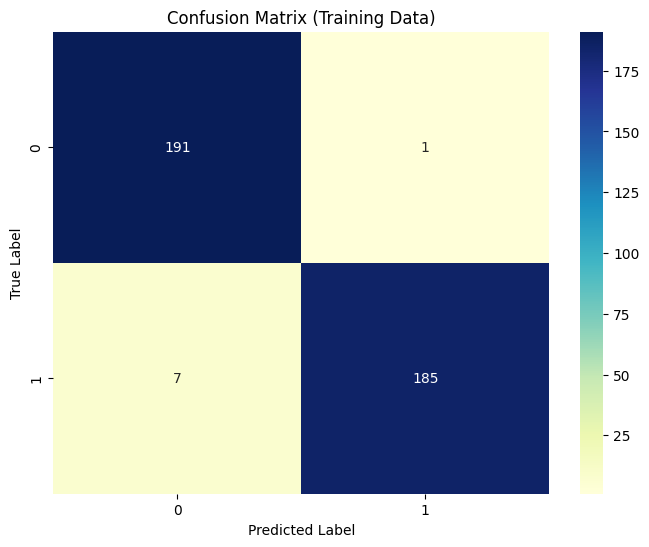

Training Data Confusion Matrix:
[[191   1]
 [  7 185]]

Training Data Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       192
         1.0       0.99      0.96      0.98       192

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384



In [ ]:
# Compute confusion matrix and classification report for training data
cm_train = confusion_matrix(y_train, prediksi_DT_train)
class_report_train = classification_report(y_train, prediksi_DT_train)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Training Data)')
plt.show()

print("Training Data Confusion Matrix:")
print(cm_train)
print("\nTraining Data Classification Report:")
print(class_report_train)

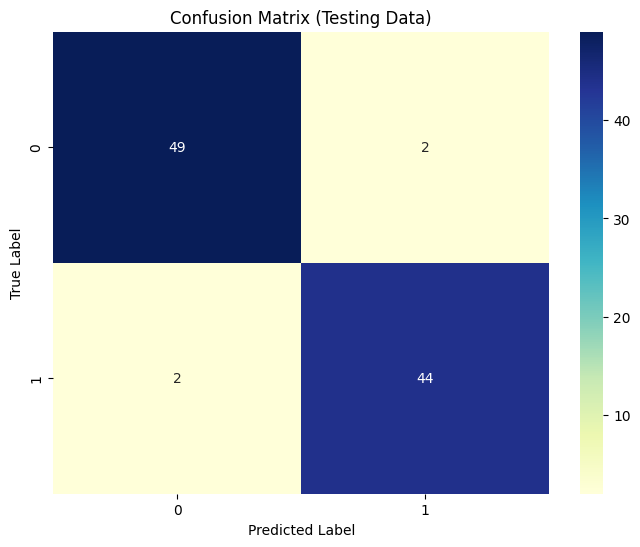

Testing Data Confusion Matrix:
[[49  2]
 [ 2 44]]

Testing Data Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        51
         1.0       0.96      0.96      0.96        46

    accuracy                           0.96        97
   macro avg       0.96      0.96      0.96        97
weighted avg       0.96      0.96      0.96        97



In [ ]:
# Compute confusion matrix and classification report for testing data
cm_test = confusion_matrix(y_test, prediksi_DT_test)
class_report_test = classification_report(y_test, prediksi_DT_test)

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

print("Testing Data Confusion Matrix:")
print(cm_test)
print("\nTesting Data Classification Report:")
print(class_report_test)

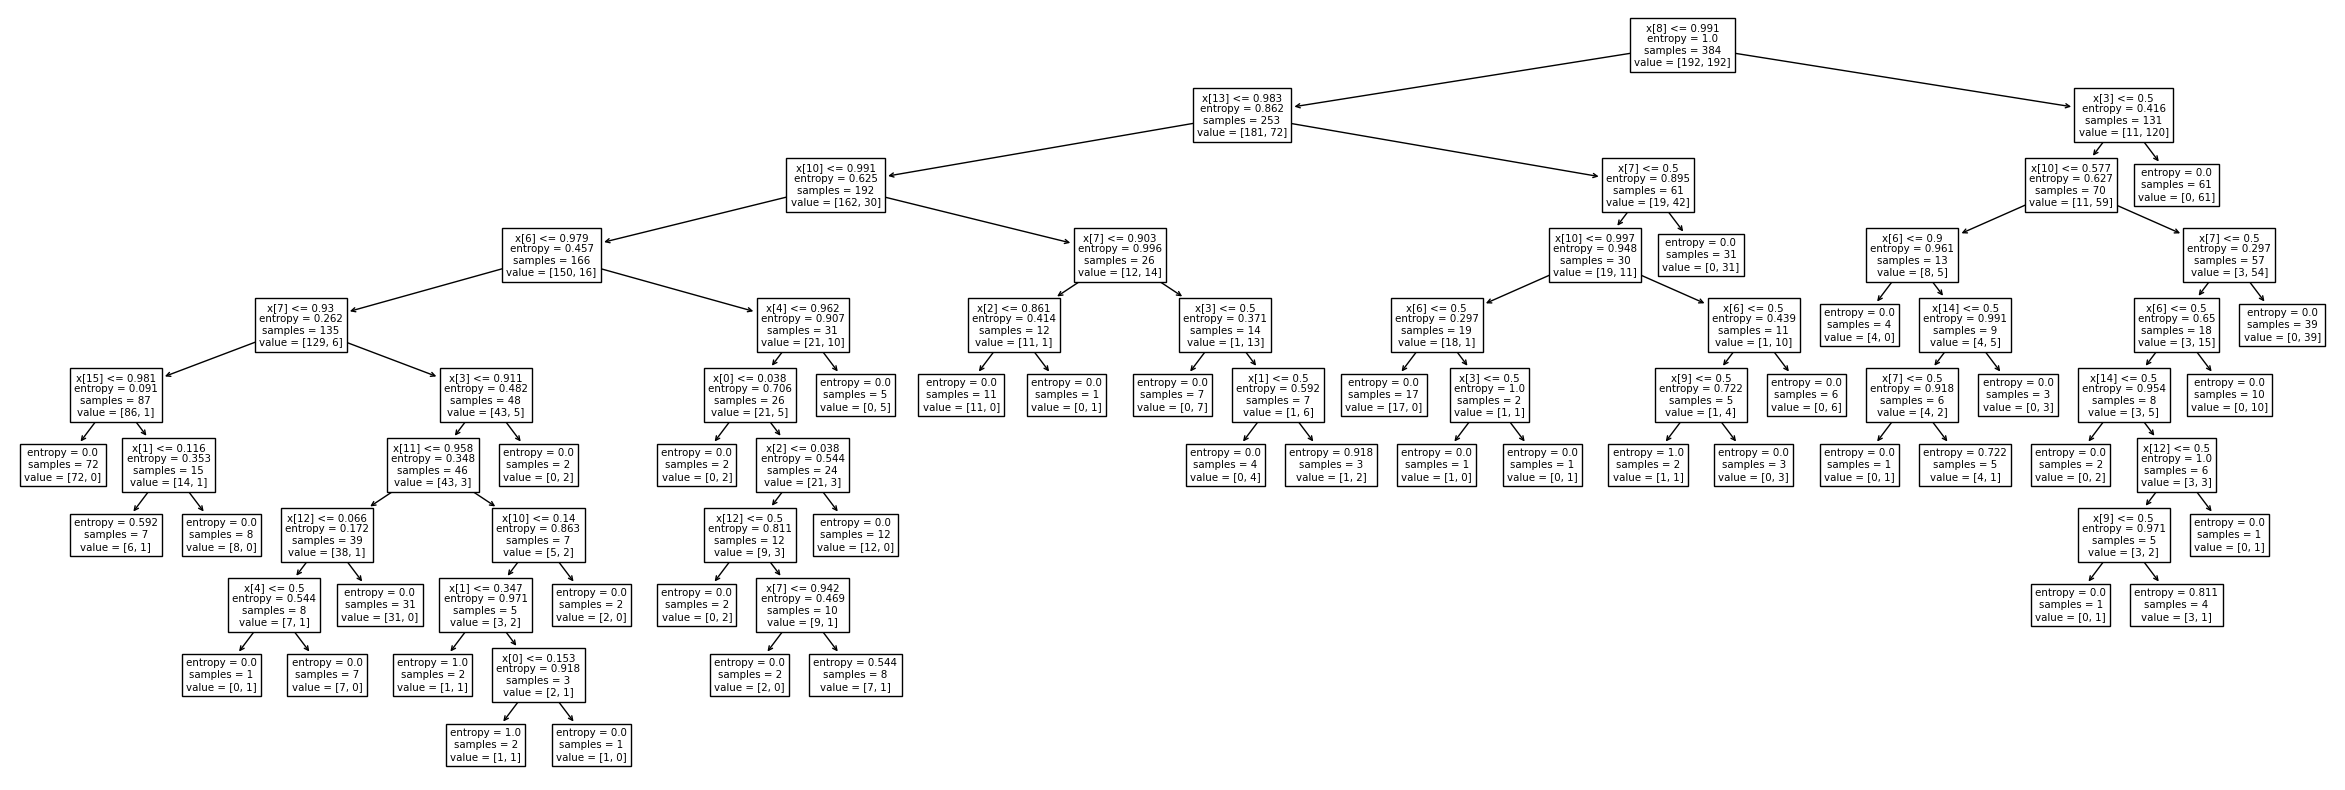

In [ ]:
plt.figure(figsize=(30,10))
p = tree.plot_tree(DT)